# Bosquejo de análisis de un archivo TLF

Procedemos a importar el módulo ```log_analyzer``` de la librería ```Pylinac``` de la siguiente manera:

In [1]:
from pylinac import log_analyzer as logan

Se importarán también otras librerías que permiten trabajar con fórmulas matemáticas y matrices, así como para gráficar:

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

A continuación cargaremos en memoria el archivo TLF demostrativo de la librería ```log_analyzer```

In [3]:
tlf_demo = logan.TrajectoryLog.from_demo()

Podemos recrear las gráficas del artículo *bozhikov2019* en las que presenta la dependencia del gamma pass rate (%GP) -provenientes de archivos TLF- en función del criterio de dosis (dose to agreement-doseTA) y dejando constante el criterio de distancia (distance to agreement-distTA) y viceversa. 

**Para el caso de la gráfica gamma pass rate (%GP)  vs doseTA:**

Crearemos 6 curvas para los 6 valores diferentes de distTA (una por cada uno):

In [4]:
distTA_1 = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05] # valores de criterio distTA que se quedarán fijos
doseTA_1 = np.linspace(0.001,0.05,40) # un vector que contiene 40 elementos desde 0.001 hasta 0.05 del criterio doseTA
doseTA_1

array([0.001     , 0.00225641, 0.00351282, 0.00476923, 0.00602564,
       0.00728205, 0.00853846, 0.00979487, 0.01105128, 0.01230769,
       0.0135641 , 0.01482051, 0.01607692, 0.01733333, 0.01858974,
       0.01984615, 0.02110256, 0.02235897, 0.02361538, 0.02487179,
       0.02612821, 0.02738462, 0.02864103, 0.02989744, 0.03115385,
       0.03241026, 0.03366667, 0.03492308, 0.03617949, 0.0374359 ,
       0.03869231, 0.03994872, 0.04120513, 0.04246154, 0.04371795,
       0.04497436, 0.04623077, 0.04748718, 0.04874359, 0.05      ])

In [5]:
gp_list = [] # lista vacía que después contendrá los valores de %GP
for dist in distTA_1:
    for dose in doseTA_1:
        tlf_demo.fluence.gamma.calc_map(doseTA=dose, distTA=dist) # cálculo del mapa gamma con estos criterios
        gp = tlf_demo.fluence.gamma.pass_prcnt
        gp_list.append(gp) # agrega el valor de %GP a la lista
gp_list = np.array(gp_list).reshape(len(distTA_1), len(doseTA_1)) # formatea a una matriz para fácil acceso

In [6]:
# Este es un arreglo de %GP para un fijo distTA = 0.001 y variando los valores de doseTA
gp_list[0] 

array([88.20981072, 88.24313516, 88.43641696, 88.43641696, 88.43641696,
       88.43641696, 89.24953346, 89.24953346, 89.24953346, 89.64942682,
       90.0359904 , 91.14236204, 91.14902693, 91.50893095, 91.50893095,
       91.70221274, 91.70221274, 91.84217542, 91.93548387, 91.94881365,
       91.94881365, 91.94881365, 91.94881365, 92.44868035, 93.09517462,
       93.27512663, 93.60170621, 94.50146628, 95.99440149, 96.16102373,
       96.16102373, 96.16768862, 96.54758731, 96.63423087, 96.64089576,
       96.64089576, 96.78752333, 96.89416156, 97.78725673, 98.15382565])

<IPython.core.display.Javascript object>


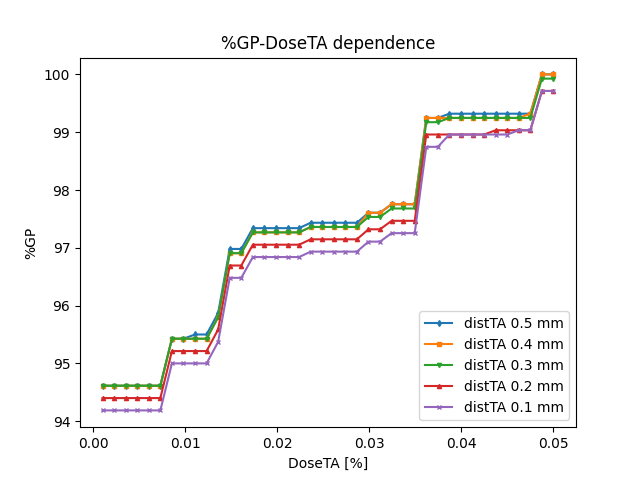

In [30]:
# Graficando las 6 curvas:
marker = ["-o","-x","-^","-v","-s","-d"]
plt.figure()
for i in range(1,len(distTA_1)): # Excluí el último por que estaba muy abajo en la gráfica
    plt.plot(doseTA_1, gp_list[-i], marker[-i], markersize=3, label="distTA " + str(distTA_1[-i]*10) + " mm")
    plt.legend(loc=4)
    plt.xlabel("DoseTA [%]")
    plt.ylabel("%GP")
plt.title("%GP-DoseTA dependence");

Esta gráfica muestra una tendencia parecida a la mostrada en la Figura 2a del artículo. Falta mayor análisis para vislumbrar porqué tienen esta forma.

**Para el caso de la gráfica gamma pass rate (%GP)  vs distTA:**

Crearemos 6 curvas para los 6 valores diferentes de doseTA (una por cada uno):

In [8]:
doseTA_2 = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05] # valores de criterio doseTA que se quedarán fijos
distTA_2 = np.linspace(0.001,0.05,40) # un vector que contiene 40 elementos desde 0.001 hasta 0.05 del criterio distTA

In [9]:
gp_list_2 = [] # lista vacía que después contendrá los valores de %GP
for dose in doseTA_2:
    for dist in distTA_2:
        tlf_demo.fluence.gamma.calc_map(doseTA=dose, distTA=dist) # cálculo del mapa gamma con estos criterios
        gp = tlf_demo.fluence.gamma.pass_prcnt
        gp_list_2.append(gp) # agrega el valor de %GP a la lista
#print(gp_list_2)
gp_list_2 = np.array(gp_list_2).reshape(len(doseTA_2), len(distTA_2)) # formatea a una matriz para fácil acceso

<IPython.core.display.Javascript object>


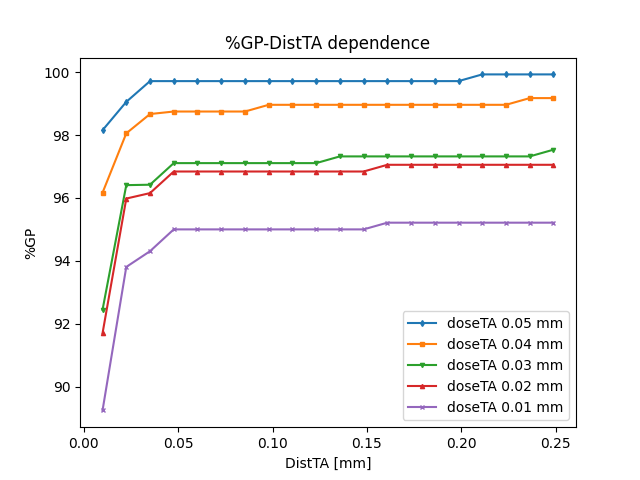

In [32]:
marker = ["-o","-x","-^","-v","-s","-d"]
plt.figure()
for i in range(1,len(doseTA_2)): # Excluí el último por que estaba muy abajo en la gráfica
    plt.plot(distTA_2[0:20]*10, gp_list_2[-i][0:20], marker[-i], markersize=3, label="doseTA " + str(doseTA_2[-i]) + " mm")
    plt.legend(loc=4)
    plt.xlabel("DistTA [mm]")
    plt.ylabel("%GP")
plt.title("%GP-DistTA dependence");

Al igual que en el caso anterior, esta gráfica muestra una tendencia similar a la mostrada en la Figura 2b. Aunque estos datos sólo fueron generados por un archivo TLF demostrativo, se deben confirmar estas gráficas con un archivo TLF obtenido en el hospital, por lo que se necesitan más de estos archivos.

In [11]:
# análisis futuro:
# Evaluando varios GP rate:
doseTA = np.linspace(0.001,0.06, 60)
distTA = np.linspace(0.001,0.06, 60)

In [12]:
for dose, dist in zip(doseTA, distTA):
    print(dose.round(3), dist.round(3))

0.001 0.001
0.002 0.002
0.003 0.003
0.004 0.004
0.005 0.005
0.006 0.006
0.007 0.007
0.008 0.008
0.009 0.009
0.01 0.01
0.011 0.011
0.012 0.012
0.013 0.013
0.014 0.014
0.015 0.015
0.016 0.016
0.017 0.017
0.018 0.018
0.019 0.019
0.02 0.02
0.021 0.021
0.022 0.022
0.023 0.023
0.024 0.024
0.025 0.025
0.026 0.026
0.027 0.027
0.028 0.028
0.029 0.029
0.03 0.03
0.031 0.031
0.032 0.032
0.033 0.033
0.034 0.034
0.035 0.035
0.036 0.036
0.037 0.037
0.038 0.038
0.039 0.039
0.04 0.04
0.041 0.041
0.042 0.042
0.043 0.043
0.044 0.044
0.045 0.045
0.046 0.046
0.047 0.047
0.048 0.048
0.049 0.049
0.05 0.05
0.051 0.051
0.052 0.052
0.053 0.053
0.054 0.054
0.055 0.055
0.056 0.056
0.057 0.057
0.058 0.058
0.059 0.059
0.06 0.06


In [13]:
params_gamma_list = []
for dose, dist in zip(doseTA, distTA):
    tlf_demo.fluence.gamma.calc_map(doseTA=dose, distTA=dist)
    params_gamma_list.append([dose.round(3), dist.round(3),
                              tlf_demo.fluence.gamma.pass_prcnt.round(3),
                              tlf_demo.fluence.gamma.avg_gamma.round(3)])
params_gamma_list

[[0.001, 0.001, 88.21, 1.702],
 [0.002, 0.002, 92.115, 0.851],
 [0.003, 0.003, 93.495, 0.567],
 [0.004, 0.004, 93.502, 0.425],
 [0.005, 0.005, 94.188, 0.34],
 [0.006, 0.006, 94.188, 0.284],
 [0.007, 0.007, 94.188, 0.243],
 [0.008, 0.008, 95.001, 0.213],
 [0.009, 0.009, 95.001, 0.189],
 [0.01, 0.01, 95.001, 0.17],
 [0.011, 0.011, 95.001, 0.155],
 [0.012, 0.012, 95.001, 0.142],
 [0.013, 0.013, 95.375, 0.131],
 [0.014, 0.014, 95.375, 0.122],
 [0.015, 0.015, 96.481, 0.113],
 [0.016, 0.016, 96.694, 0.106],
 [0.017, 0.017, 97.054, 0.1],
 [0.018, 0.018, 97.054, 0.095],
 [0.019, 0.019, 97.054, 0.09],
 [0.02, 0.02, 97.054, 0.085],
 [0.021, 0.021, 97.054, 0.081],
 [0.022, 0.022, 97.054, 0.077],
 [0.023, 0.023, 97.054, 0.074],
 [0.024, 0.024, 97.147, 0.071],
 [0.025, 0.025, 97.147, 0.068],
 [0.026, 0.026, 97.361, 0.065],
 [0.027, 0.027, 97.361, 0.063],
 [0.028, 0.028, 97.361, 0.061],
 [0.029, 0.029, 97.534, 0.059],
 [0.03, 0.03, 97.534, 0.057],
 [0.031, 0.031, 97.534, 0.055],
 [0.032, 0.032, 97.5

In [14]:
# Conversion a numpy array y de cm a mm
params_gamma_list = np.array(params_gamma_list,dtype= np.float).reshape(len(params_gamma_list), 4)
params_gamma_list[:,1] = params_gamma_list[:,1]*10

In [15]:
params_gamma_list.shape # comprobación

(60, 4)

<IPython.core.display.Javascript object>


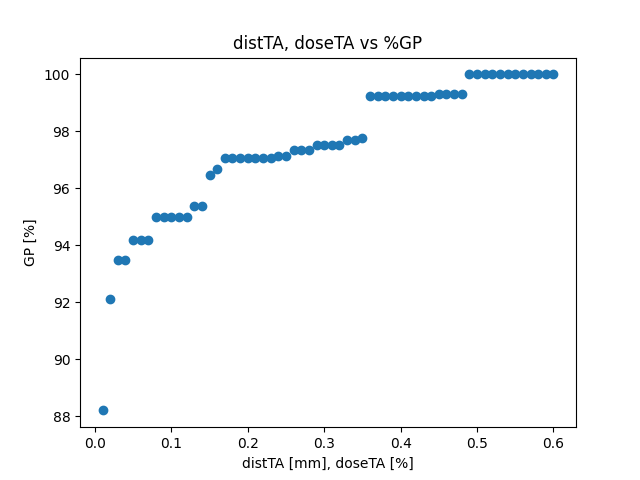

In [16]:
plt.figure()
plt.scatter(x=params_gamma_list[:,1], y=params_gamma_list[:,2])
plt.title("distTA, doseTA vs %GP")
plt.xlabel("distTA [mm], doseTA [%]")
plt.ylabel("GP [%]");